### Section 2.1: The Binomial Branch Model

This is the simplest discrete-time model that captures the essential ingredients of a financial market:
- **Randomness** (uncertain asset prices)
- **Time value of money** (interest on risk-free investment)

---

### The Stock

We model the stock price over one time step, from $t = 0$ to $t = \Delta t$:
- Starts at $s_1$
- Moves to:
  - $s_3$ with probability $p$ (up)
  - $s_2$ with probability $1 - p$ (down)

#### Assumptions:
- The stock is traded freely at price $s_1$, in unlimited quantity
- No dividends, no transaction costs, and no holding penalties
- The randomness is binary and explicitly defined by probabilities $p$ and $1 - p$

---

### The Bond

To represent the time value of money, we introduce a **cash bond**:
- Pays a continuously compounded interest rate $r$
- A bond worth $B_0$ at $t = 0$ grows deterministically to $B_0 \cdot \exp(r \Delta t)$ at $t = \Delta t$
- Unlimited borrowing and lending are permitted at this rate

With both assets:
- The **stock** introduces market uncertainty
- The **bond** offers deterministic growth

---

### Payoff Representation

Investors may want claims that depend on the stock’s outcome. Any such contract can be represented as a function $f$:
- $f(2)$: payoff if the stock goes to $s_2$ (down)
- $f(3)$: payoff if the stock goes to $s_3$ (up)

#### Example: Forward Contract with Strike $k$
The payoff function is:
- $f(2) = s_2 - k$
- $f(3) = s_3 - k$

This reflects the fact that, in a forward contract, the buyer agrees in advance to pay $k$ for the stock at maturity.  
So if the stock ends up at $s_2$, the payoff is $s_2 - k$: the value of the stock minus what was promised.  
Likewise, if the stock goes to $s_3$, the payoff is $s_3 - k$.


This sets up the foundation for **replicating portfolios** and **arbitrage-free pricing** in discrete-time models.



### Risk-Free Construction

The key question: **Which derivative payoffs can be replicated using stock and bond?**

- Forward contracts can be replicated:
  - Buy the stock at $s_1$
  - Finance it by borrowing (selling bonds)
  - At maturity, deliver the stock and receive $s_1 \cdot \exp(r \Delta t)$
  - This matches the forward payoff exactly, so its price must be $s_1 \cdot \exp(r \Delta t)$

- For more general claims (functions $f$):
  - We know their possible outcomes: $f(2)$ and $f(3)$
  - And their expected value: $(1 - p)f(2) + p f(3)$
  - But it's not clear yet whether they can be perfectly replicated with a stock–bond portfolio

This opens the core question of **which payoffs admit risk-free replication**, the foundation for no-arbitrage 
pricing.

### Bond-Only Strategy

We can match the expected value of a derivative's payoff using bonds by calculating the PV of the expected payoff of the derivative:

$$
\text{Price} = \exp(-r \Delta t) \cdot \left[(1 - p)f(2) + p f(3)\right]
$$

But this only targets the **expected payoff**, not the actual outcomes $f(2)$ and $f(3)$.  
It's just expectation pricing in disguise — not true replication.  
As with forwards, this approach **fails to enforce** arbitrage-free pricing.

### Stocks and Bonds Together

Using both the stock and the bond, we can construct a portfolio to **exactly replicate** the payoff of any derivative defined by:
- $f(2)$: payoff if the stock goes **down**
- $f(3)$: payoff if the stock goes **up**

---

### Replicating Portfolio Construction

Let:

- $\phi$ = number of shares of stock  
- $\psi$ = number of units of bond

Construct a portfolio such that:

- $\phi s_3 + \psi B_0 \exp(r \Delta t) = f(3)$  
- $\phi s_2 + \psi B_0 \exp(r \Delta t) = f(2)$

Solving this gives:

- $\phi = \frac{f(3) - f(2)}{s_3 - s_2}$  
- $\psi = \frac{f(3) - \phi s_3}{B_0 \exp(r \Delta t)} = B_0^{-1} \cdot \exp(-r \Delta t) \cdot \left( f(3) - \frac{f(3) - f(2)}{s_3 - s_2} \cdot s_3 \right)$


---

### No-Arbitrage Price of the Derivative

The **arbitrage-free price** of the derivative is the **cost of this replicating portfolio**:

$$
V = \phi s_1 + \psi B_0
$$

This is the only price that prevents arbitrage.

---

### Arbitrage Logic

If the market price $P \\ne V$:

- If $P < V$:
  - Buy the derivative  
  - **Sell the replicating portfolio** (short stock, sell bonds)  
  - Lock in risk-free profit: $V - P$

- If $P > V$:
  - Sell the derivative  
  - **Buy the replicating portfolio**  
  - Lock in risk-free profit: $P - V$

---

### Selling the Portfolio

To **sell the portfolio**:
- Short the stock (if $\phi > 0$)
- Sell or borrow the bond (if $\psi > 0$)

This is taking the **opposite side** of the replication strategy, and receives $V$ in cash today.

---

### Conclusion

Any two-outcome derivative $f$ can be perfectly replicated using stock and bond.  
Its unique, enforceable, arbitrage-free price is the cost of this replicating strategy.  
This replaces expectation-based pricing with **construction-based pricing**.



### Example: Replicating a Digital Option in One Step

We have a bond and a stock, both initially priced at $1.  
At the next time step, the stock is worth either:
- $2 (up)
- $0.50 (down)

We want to price a derivative (bet) that pays:
- $1 if the stock goes up
- $0 if the stock goes down

---

### Constructing the Replicating Portfolio

Use:
- $\phi = \frac{2}{3}$ units of stock  
- $\psi = -\frac{1}{3}$ units of bond (i.e., borrow bond)

**Initial cost of the portfolio**:
$$
V = \frac{2}{3} \cdot 1 - \frac{1}{3} \cdot 1 = 0.33
$$

---

### Portfolio Payoff at Maturity

- If stock goes to $2$:
  $$
  \frac{2}{3} \cdot 2 - \frac{1}{3} \cdot 1 = 1
  $$
- If stock goes to $0.50$:
  $$
  \frac{2}{3} \cdot 0.5 - \frac{1}{3} \cdot 1 = 0
  $$

The portfolio exactly replicates the bet’s payoff.

---

### Conclusion

The arbitrage-free price of the derivative is the **initial value of the replicating portfolio**, which is **$0.33**.  
This confirms that **replication, not expectation**, determines fair pricing in this model.


### Expectation Regained

Although pricing based on real-world probabilities ($p$ and $1 - p$) leads to arbitrage,  
a new kind of expectation re-emerges through **market-implied structure**.

---

### Defining $q$

We define a synthetic number:

$$
q = \frac{s_1 \cdot \exp(r \Delta t) - s_2}{s_3 - s_2}
$$

- This $q$ is not a probability in the real-world sense.
- It is **implied by the no-arbitrage conditions** of stock and bond prices.
- To avoid arbitrage, $q$ must lie strictly between 0 and 1.

---

### Pricing with $q$

The price of the replicating portfolio becomes:

$$
V = \exp(-r \Delta t) \cdot \left[(1 - q) f(2) + q f(3)\right]
$$

This is the **discounted expectation of the payoff**, but under the synthetic probability $q$.

---

### Interpretation

- $V$ is **not** the expected value under $p$, the real-world probability.
- $V$ **is** a discounted expectation under $q$, derived from market prices.
- This is the foundation of **risk-neutral pricing**.

Even though the strong law fails, **expectation returns — transformed** into a tool of arbitrage-free pricing.


### Section 2.2: The Binomial Tree Model

We extend the single-period binomial **branch** into a multi-step **tree**, modeling the stock price across time.

---

### Market Setup

- Two tradable assets:
  - **Stock** $S$: evolves randomly
  - **Discount bond** $B$: grows deterministically
- No transaction costs, credit risk, or trading limits

---

### Tree Structure

- Time is divided into discrete steps of length $\Delta t$
- At each time $i$, the stock can move **up or down**
- Each node $j$ leads to:
  - $2j$ (down move)
  - $2j+1$ (up move)

This defines a binary tree:
- At time $i$, there are $2^i$ possible nodes
- Stock values are $s_j$ at each node

---

### Stock Dynamics

- At each node $s_j$ at time $i$, the stock moves to:
  - $s_{2j+1}$ with probability $p_j$
  - $s_{2j}$ with probability $1 - p_j$
- Probabilities may vary by node: the process is **locally defined**

---

### Key Features

- Flexibility: the tree allows a large number of future stock values
- Generality: the structure supports arbitrary derivative claims with many outcomes
- Still binary: only **two possible moves** from any node

This model is rich enough to represent realistic market behavior, while still being analytically tractable via backward induction.


### The Cash Bond in the Tree Model

- The bond grows at a continuously compounded interest rate.
- In general, the rate can vary at each step: $R_0, R_1, \dots$
  - Bond value at time $n\Delta t$:
    $$
    B_n = B_0 \cdot \exp\left(\sum_{i=0}^{n-1} R_i \Delta t \right)
    $$
- However, for simplicity, we assume a constant rate $r$:
  $$
  B_n = B_0 \cdot \exp(r n \Delta t)
  $$

**Key difference from stock**:  
- Bond growth is deterministic and known in advance  
- Stock value remains random at each step


### The Two-Step Binomial Tree

This section demonstrates backward induction in a two-step binomial model (three time levels).
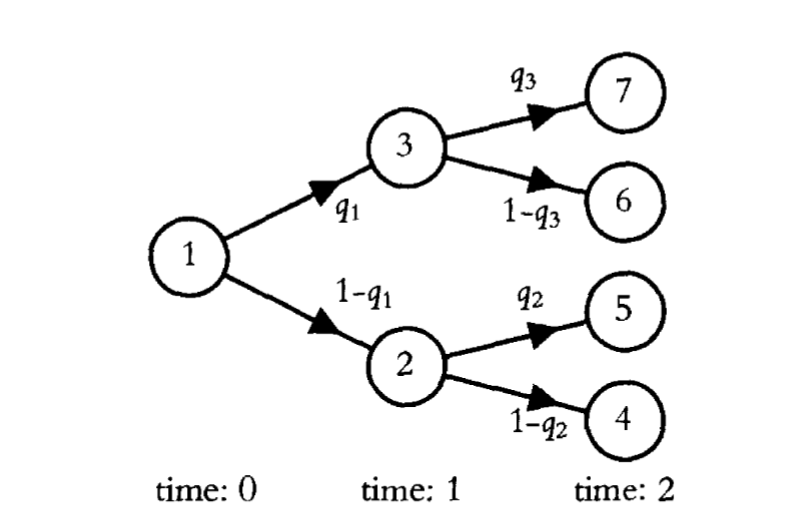

---

### Tree Setup

- Constant interest rate $r$
- Time steps: $t = 0, \Delta t, 2\Delta t$
- Final payoffs: $f(4), f(5), f(6), f(7)$

---

### Step 1: Time $t = 2$ (Final Layer)

Final node values are given:
- Nodes 4, 5, 6, 7 hold the known values of the derivative at expiry.

---

### Step 2: Time $t = \Delta t$ (Intermediate Nodes)

At node 2 (leads to nodes 4 and 5):

- Risk-neutral probability:
  $$
  q_2 = \frac{s_2 \cdot e^{r \Delta t} - s_4}{s_5 - s_4}
  $$

- Value at node 2:
  $$
  f(2) = e^{-r \Delta t} \left( q_2 f(5) + (1 - q_2) f(4) \right)
  $$

At node 3 (leads to nodes 6 and 7):

- Risk-neutral probability:
  $$
  q_3 = \frac{s_3 \cdot e^{r \Delta t} - s_6}{s_7 - s_6}
  $$

- Value at node 3:
  $$
  f(3) = e^{-r \Delta t} \left( q_3 f(7) + (1 - q_3) f(6) \right)
  $$

---

### Step 3: Time $t = 0$ (Root Node)

At node 1 (leads to nodes 2 and 3):

- Risk-neutral probability:
  $$
  q_1 = \frac{s_1 \cdot e^{r \Delta t} - s_2}{s_3 - s_2}
  $$

- Value at node 1:
  $$
  f(1) = e^{-r \Delta t} \left( q_1 f(3) + (1 - q_1) f(2) \right)
  $$

---

### General Formulas

For any node $j$, the general backward induction step is:

- Value:
  $$
  f(j) = e^{-r \Delta t} \left( q_j f(2j + 1) + (1 - q_j) f(2j) \right)
  $$

- Risk-neutral probability:
  $$
  q_j = \frac{s_j \cdot e^{r \Delta t} - s_{2j}}{s_{2j+1} - s_{2j}}
  $$

---

### Summary

- This three-layer tree shows how to compute derivative prices using **backward induction**
- Each node uses a **local replication** via risk-neutral expectation and discounting
- The approach generalizes to any number of steps


### Expectation on a Tree

Each path through a binomial tree carries a probability equal to the **product of the local branch probabilities**.

For example, in a two-step tree:
- Up → Up: $q_1 q_3$
- Up → Down: $q_1 (1 - q_3)$
- Down → Up: $(1 - q_1) q_2$
- Down → Down: $(1 - q_1)(1 - q_2)$

---

### Tree Expectation

The **expectation** of a claim defined on the final nodes is the **sum of the terminal payoffs weighted by their path probabilities**:
$$
\mathbb{E}[f] = \sum_{\text{paths}} \text{path-probability} \cdot f(\text{terminal node})
$$

---

### Present Value

To find the **current value** of the claim:
- Take the **expected value under the risk-neutral tree probabilities**
- Apply the **appropriate discount factor**

For a two-step tree with constant rate $r$, this gives:
$$
V = e^{-2r \Delta t} \cdot \mathbb{E}_{\text{tree}}[f]
$$

Thus, backward induction and expectation over the tree are two views of the same pricing method under no-arbitrage.


### The Inductive Step

At any interior node $j$, given the values of the claim at its two children ($f(2j)$ and $f(2j+1)$), we compute:

$$
f(j) = e^{-r \Delta t} \left( q_j f(2j+1) + (1 - q_j) f(2j) \right)
$$

This is the local pricing rule — backward induction one layer at a time.

---

### The Inductive Result

By applying the inductive step repeatedly, from terminal nodes back to the root:

- The value at any node is the **discounted expectation of final payoffs**
- Computed under the **product of local risk-neutral probabilities** along each path

Formally, this confirms that:
$$
f(j) = \text{risk-neutral price at node } j
$$

---

### Expectation Again

The value at the root node ($f(1)$) is the **discounted expected value** of the claim over all terminal paths:

$$
f(1) = e^{-nr \Delta t} \sum_{\text{paths}} (\text{path probability}) \cdot f(\text{terminal node})
$$

This expectation is taken under the **tree of $q_j$ values**, not real-world probabilities.  
It generalizes the risk-neutral pricing principle to any depth of binomial tree.
